In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace

# Set TensorFlow backend
os.environ["DEEPFACE_BACKEND"] = "tensorflow"




img1_path = "D:/Projects/finalGPT/originals/1224/1224-0.jpg"  
img2_path = "D:/Projects/finalGPT/originals/1224/1224-1.jpg"  

result =DeepFace.verify(img1_path, img2_path, model_name="ArcFace", enforce_detection=False)
distance = result["distance"]
print(distance)
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.bar(["Similarity"], [similarity / 100], color="blue")
# ax.set_ylim(0, 1)
# ax.set_title("Similarity Score")
# plt.suptitle(f"Similarity: {similarity:.2f}%", fontsize=16)
        
# plt.show()



0.388597


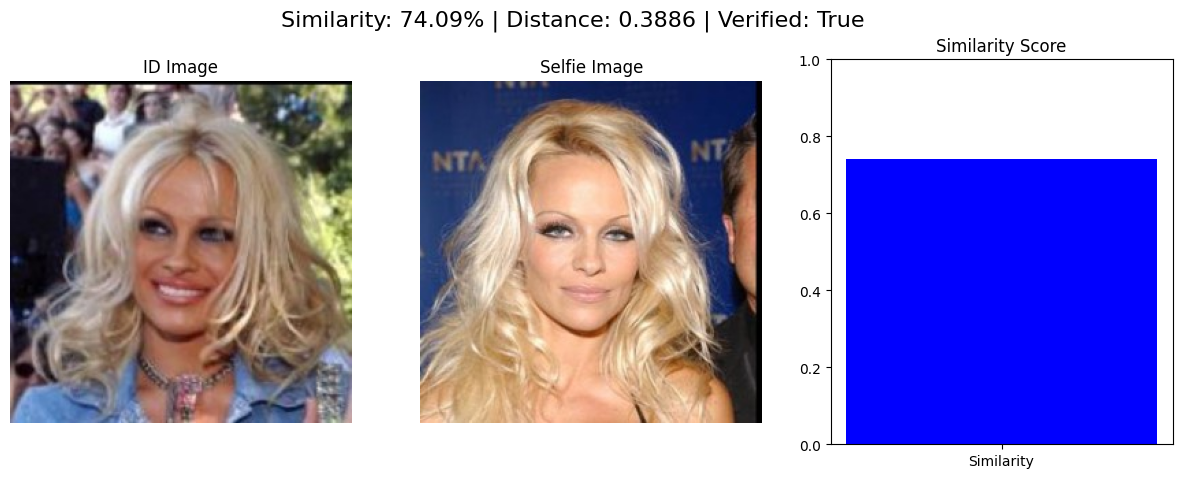

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
import cv2
os.environ["DEEPFACE_BACKEND"] = "tensorflow"




img1_path = "D:/Projects/finalGPT/originals/1224/1224-0.jpg" 
img2_path = "D:/Projects/finalGPT/originals/1224/1224-1.jpg" 

def load_image(img_path):
    """Load image in RGB format for display."""
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Could not load image: {img_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb


result =DeepFace.verify(img1_path, img2_path, model_name="ArcFace", enforce_detection=False)
dist = result["distance"]
verified = result["verified"]
# Calculate similarity score (as per your example)
similarity = max(0, 100 * (1 - dist / 1.5))

# Load images for display
id_img = load_image(img1_path)
selfie_img = load_image(img2_path)

# Create plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(id_img)
ax1.set_title("ID Image")
ax1.axis("off")

ax2.imshow(selfie_img)
ax2.set_title("Selfie Image")
ax2.axis("off")

ax3.bar(["Similarity"], [similarity / 100], color="blue")
ax3.set_ylim(0, 1)
ax3.set_title("Similarity Score")

plt.suptitle(
    f"Similarity: {similarity:.2f}% | Distance: {dist:.4f} | Verified: {verified}",
    fontsize=16
)

plt.show()


# fig, ax = plt.subplots(figsize=(5, 5))
# ax.bar(["Similarity"], [similarity / 100], color="blue")
# ax.set_ylim(0, 1)
# ax.set_title("Similarity Score")
# plt.suptitle(f"Similarity: {similarity:.2f}%", fontsize=16)
        
# plt.show()


In [ ]:
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt
import numpy as np

def evaluate_deepface_no_sklearn(csv_path, model_name="ArcFace", threshold=0.7):
    """
    Evaluates DeepFace on a custom CSV test dataset and generates a confusion matrix.
    
    CSV format:
        - If header exists: columns must include something like ["id_path", "selfie_path", "label"]
        - If no header: first 3 columns will be treated as [id_path, selfie_path, label]
    """

    df = pd.read_csv(csv_path)
    
    if list(df.columns)[:3] == [0, 1, 2]:
        df = pd.read_csv(csv_path, header=None, names=["id_path", "selfie_path", "label"])
    else:
        col_map = {c.lower(): c for c in df.columns}  # lowercase mapping
        df = df.rename(columns={
            col_map.get("id_path", list(df.columns)[0]): "id_path",
            col_map.get("selfie_path", list(df.columns)[1]): "selfie_path",
            col_map.get("label", list(df.columns)[2]): "label"
        })

    all_labels = []
    all_preds = []

    for _, row in df.iterrows():
        id_img = row["id_path"]
        selfie_img = row["selfie_path"]
        label = int(row["label"])

        try:
            result = DeepFace.verify(id_img, selfie_img, model_name=model_name, enforce_detection=False)
            dist = result["distance"]
            pred = 1 if dist < threshold else 0
        except Exception as e:
            print(f"Skipping pair {id_img}, {selfie_img} due to error: {e}")
            continue

        all_labels.append(label)
        all_preds.append(pred)

    cm = np.zeros((2, 2), dtype=int)
    for true, pred in zip(all_labels, all_preds):
        cm[true, pred] += 1

    accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {accuracy*100:.2f}%")

    # Plot confusion matrix
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap="Blues")

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Pred 0 (Different)", "Pred 1 (Same)"])
    ax.set_yticklabels(["True 0 (Different)", "True 1 (Same)"])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    plt.colorbar(im, ax=ax)

    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="red")

    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


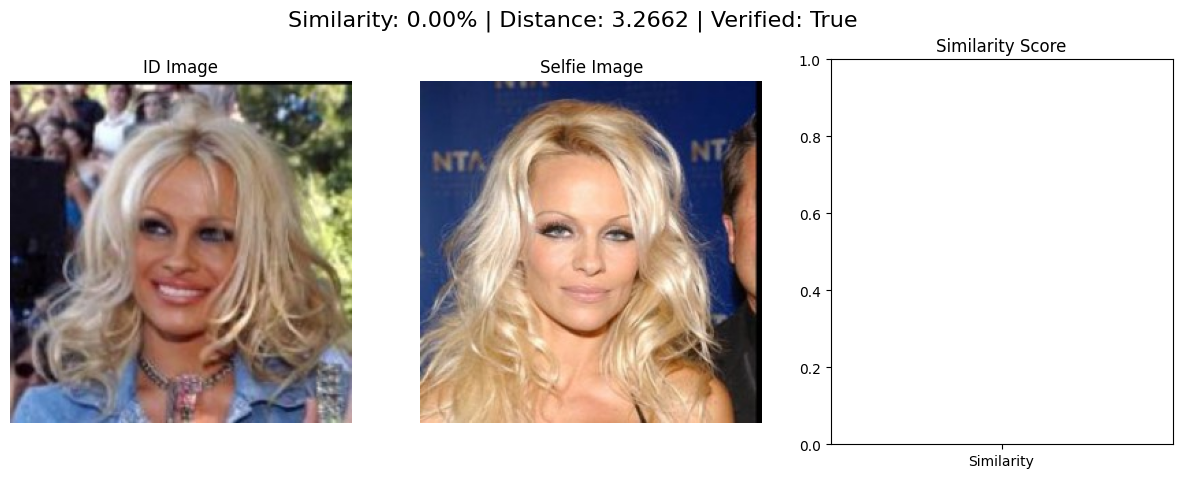

Distance: 3.2662, Similarity: 0.00%, Verified: True


In [ ]:
import cv2
os.environ["DEEPFACE_BACKEND"] = "tensorflow"


def verify_and_plot(img1_path, img2_path, model_name="ArcFace"):
    try:
        result = DeepFace.verify(
            img1_path=img1_path,
            img2_path=img2_path,
            model_name=model_name,
            enforce_detection=False,
            distance_metric="euclidean"
        )

        dist = result["distance"]
        verified = result["verified"]

        similarity = max(0, 100 * (1 - dist / 1.5))

        id_img = load_image(img1_path)
        selfie_img = load_image(img2_path)

        # Create plot
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        ax1.imshow(id_img)
        ax1.set_title("ID Image")
        ax1.axis("off")

        ax2.imshow(selfie_img)
        ax2.set_title("Selfie Image")
        ax2.axis("off")

        ax3.bar(["Similarity"], [similarity / 100], color="blue")
        ax3.set_ylim(0, 1)
        ax3.set_title("Similarity Score")

        plt.suptitle(
            f"Similarity: {similarity:.2f}% | Distance: {dist:.4f} | Verified: {verified}",
            fontsize=16
        )

        # Show plot
        plt.show()

        return fig, f"Distance: {dist:.4f}, Similarity: {similarity:.2f}%, Verified: {verified}"

    except Exception as e:
        print(f"Error: {e}")
        return None, str(e)
    

img1_path = "D:/Projects/finalGPT/originals/1224/1224-0.jpg"  
img2_path = "D:/Projects/finalGPT/originals/1224/1224-1.jpg"  
fig, result = verify_and_plot(img1_path, img2_path, model_name="ArcFace")
print(result)